In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# %reset -f
%whos

Variable   Type    Data/Info
----------------------------
Axes3D     type    <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>
xs         list    n=0
ys         list    n=0
zs         list    n=0


In [0]:
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Input, Conv2D,MaxPooling2D,UpSampling2D, Dense
from keras.models import Model
from keras import backend as K
from keras.optimizers import RMSprop, SGD, Adam
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


from keras.models import load_model



Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_rows, img_cols = 28, 28

In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)      #   (60000, 1, 28, 28)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)         #   (10000, 1, 28, 28)
    input_shape = (1, img_rows, img_cols)                                   #          (1, 28, 28)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)      #   (60000, 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)         #   (10000, 28, 28, 1)
    input_shape = (img_rows, img_cols, 1)                                   #          (28, 28, 1)


In [0]:
x_train=x_train.astype(np.float32)
x_test=x_test.astype(np.float32)
y_train=y_train.astype(np.float32)
y_test=y_test.astype(np.float32)
x_train = x_train.reshape(-1,28*28)/np.max(x_train)
x_test  = x_test.reshape(-1,28*28)/np.max(x_test)
(x_train.dtype, x_test.dtype),(x_train.shape,x_test.shape)

((dtype('float32'), dtype('float32')), ((60000, 784), (10000, 784)))

In [0]:
train_x, valid_x, train_ground, valid_ground = train_test_split(x_train,x_train,test_size=0.2)#,random_state=13)
train_x.shape, valid_x.shape

((48000, 784), (12000, 784))

In [0]:
def create_model(l1=100,l2=10):
	# create model
	model = Sequential([
    Dense(l1, input_dim=784,activation='relu'),
#     Dense(50,activation='relu'),
    Dense(l2,activation='relu'),
#     Dense(50,activation='relu'),
    Dense(l1,activation='relu'),
    Dense(784, activation='sigmoid')])
	# Compile model
	model.compile(loss='mse', optimizer='adam')
	return model

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(l1=60,l2=8,activation='relu',optimizer='rmsprop'):
    model = Sequential([
    Dense(l1, input_dim=784,activation=activation),
    Dense(l2,activation=activation),
    Dense(l1,activation=activation),
    Dense(784, activation='sigmoid')])
    model.compile(loss='mse', optimizer=optimizer)
    return model


10 10 10


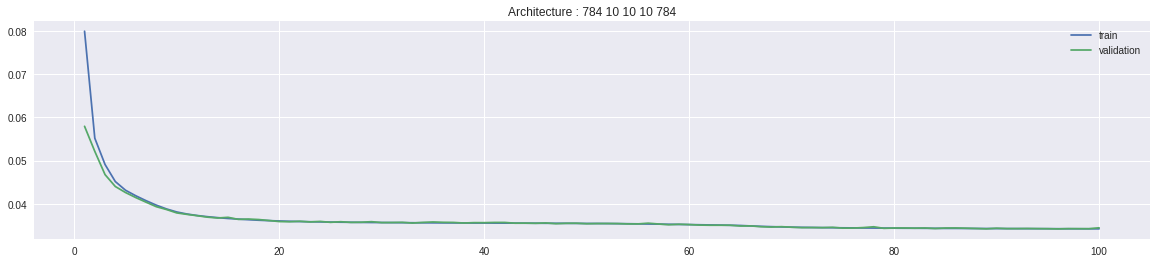

Test Images


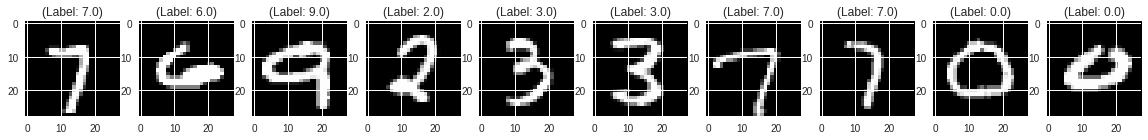

Reconstruction of Test Images


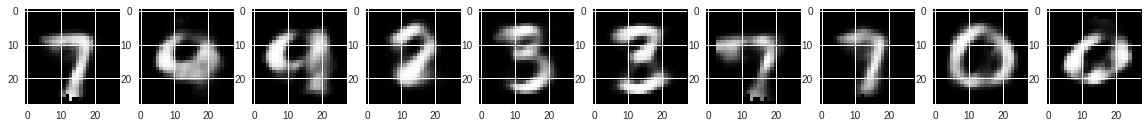

50 10 50


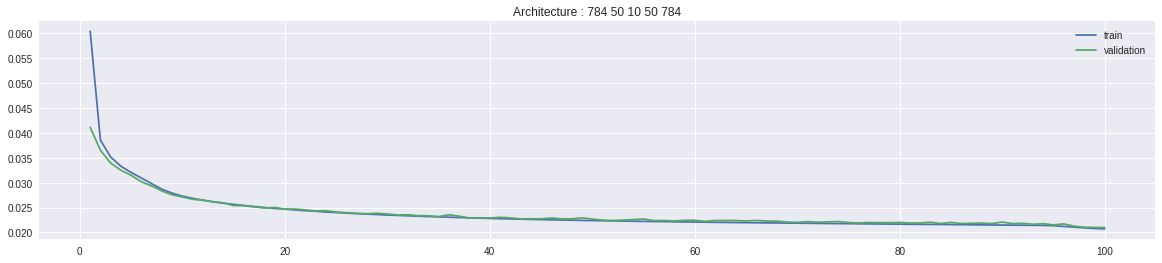

Test Images


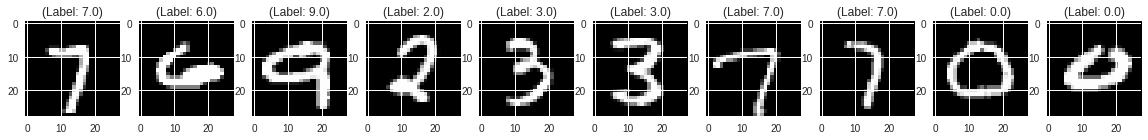

Reconstruction of Test Images


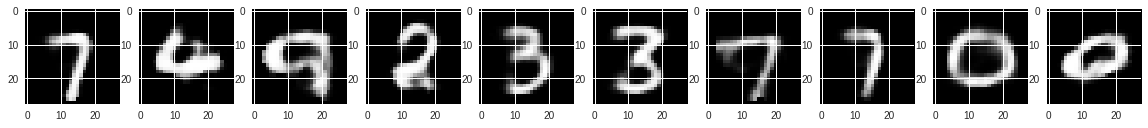

100 10 100


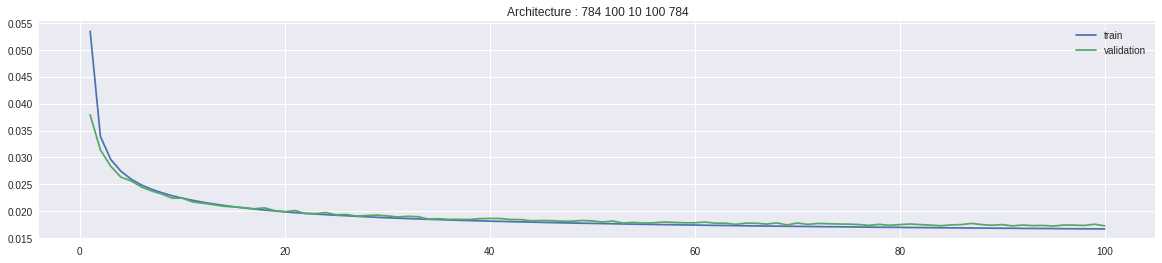

Test Images


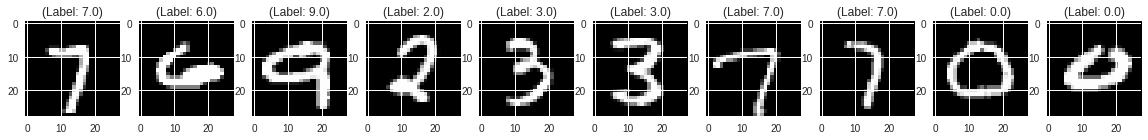

Reconstruction of Test Images


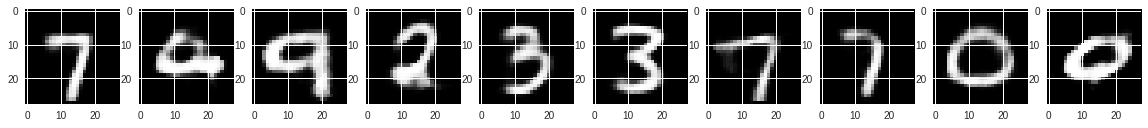

200 10 200


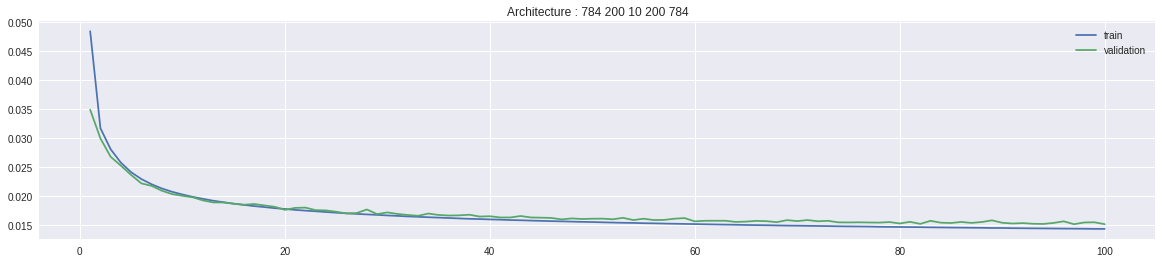

Test Images


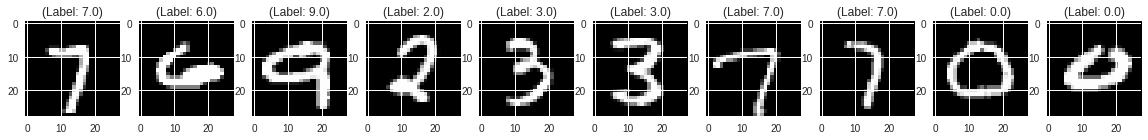

Reconstruction of Test Images


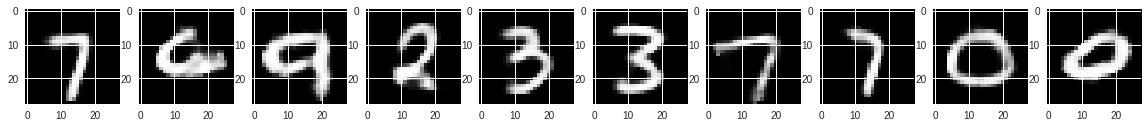

300 10 300


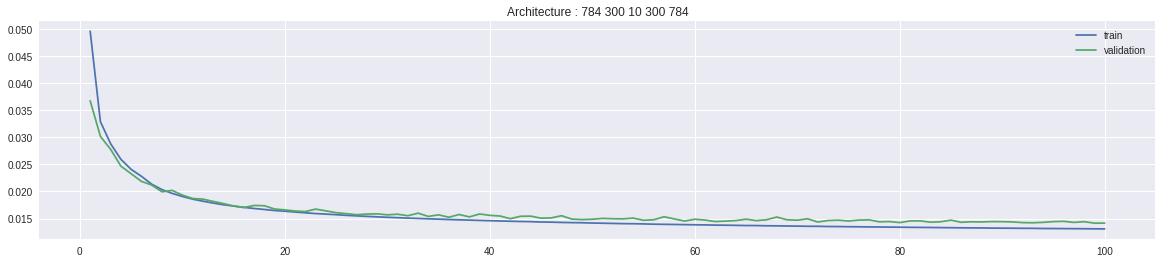

Test Images


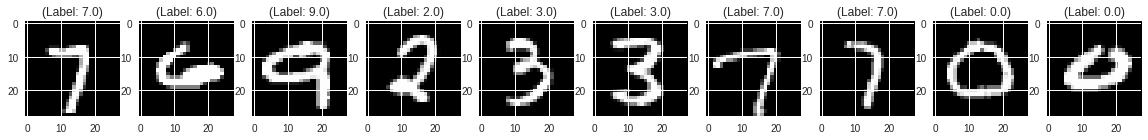

Reconstruction of Test Images


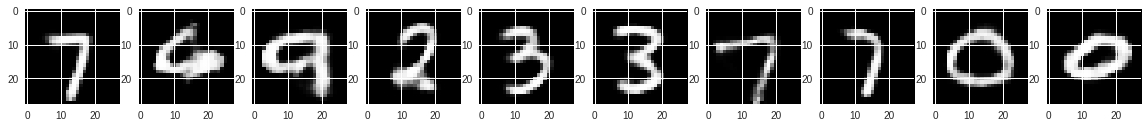

10 20 10


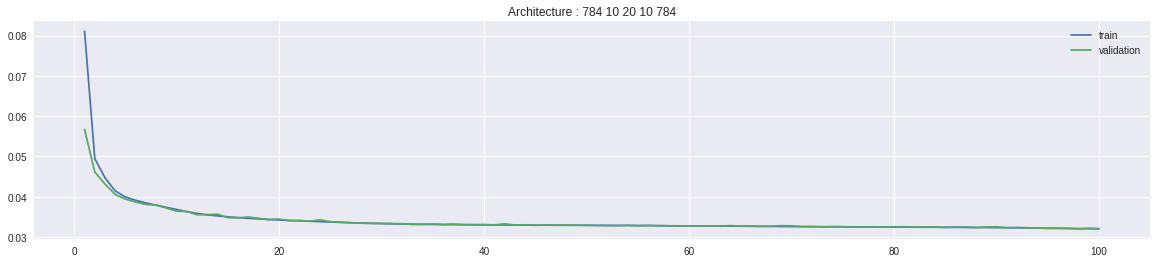

Test Images


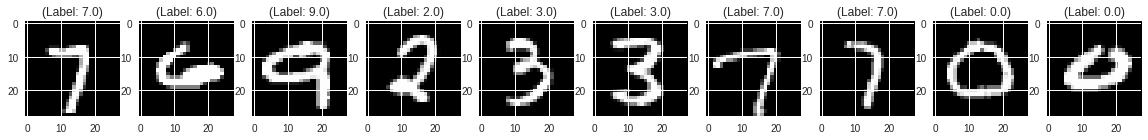

Reconstruction of Test Images


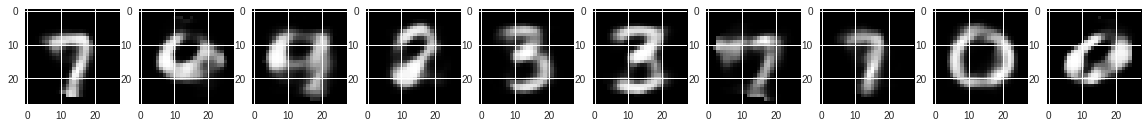

50 20 50


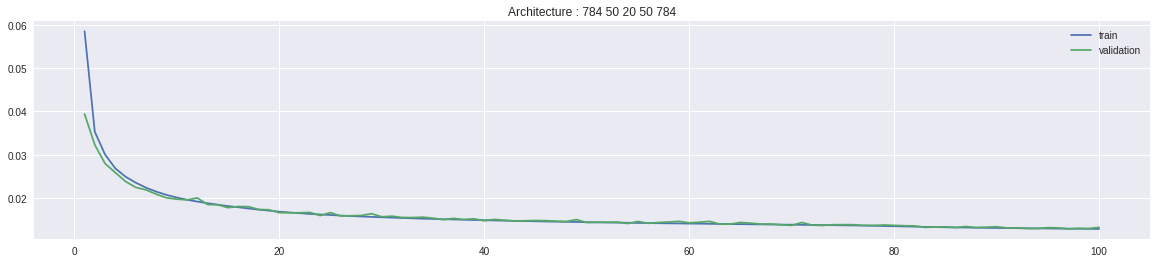

Test Images


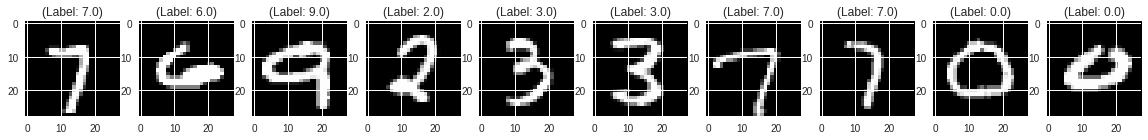

Reconstruction of Test Images


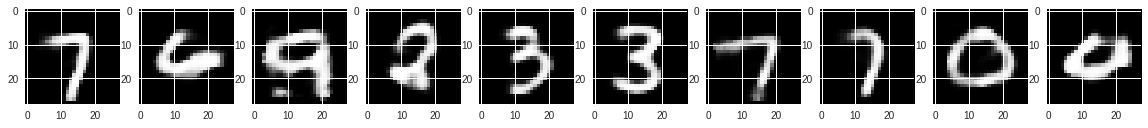

100 20 100


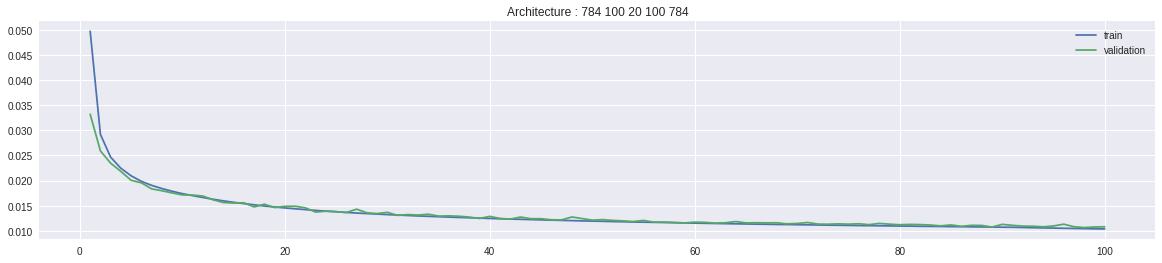

Test Images


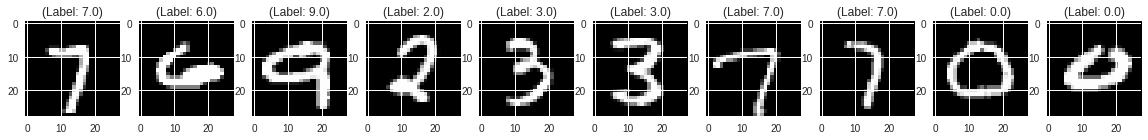

Reconstruction of Test Images


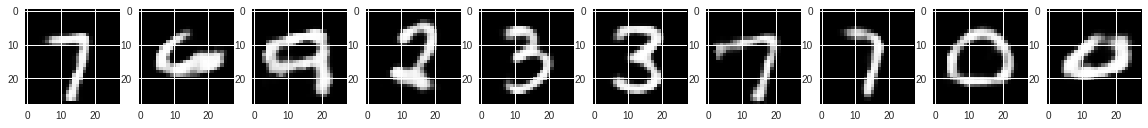

200 20 200


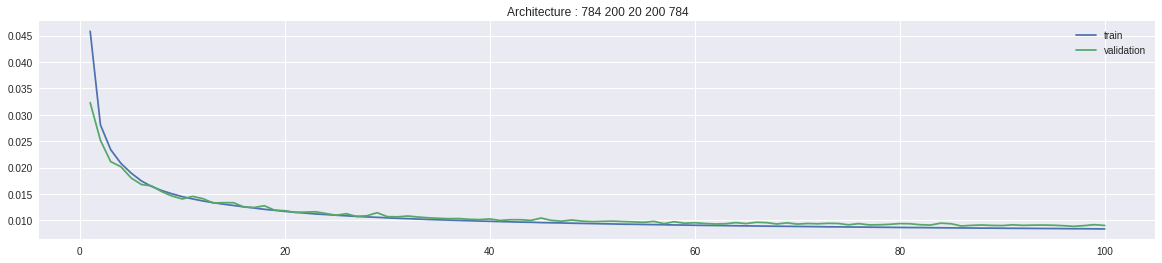

Test Images


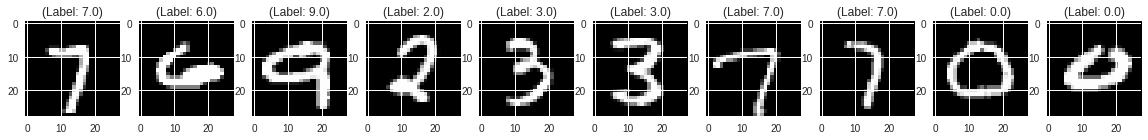

Reconstruction of Test Images


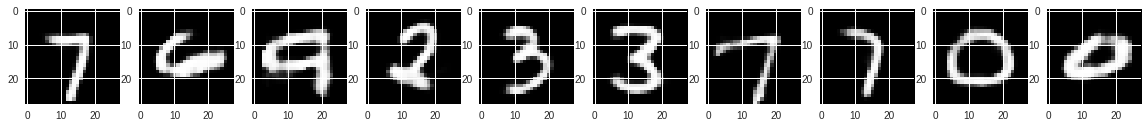

300 20 300


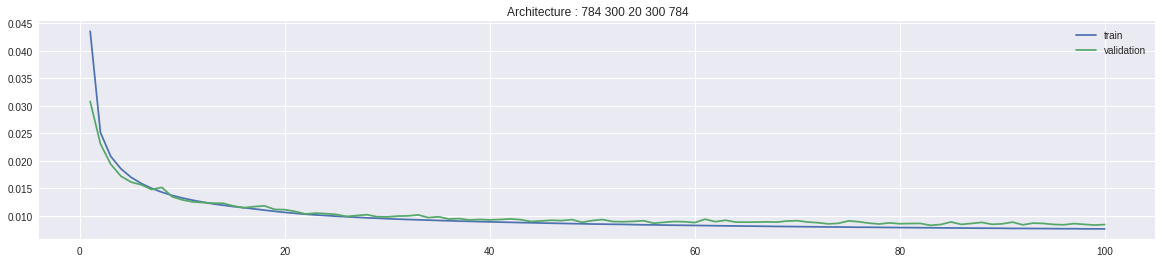

Test Images


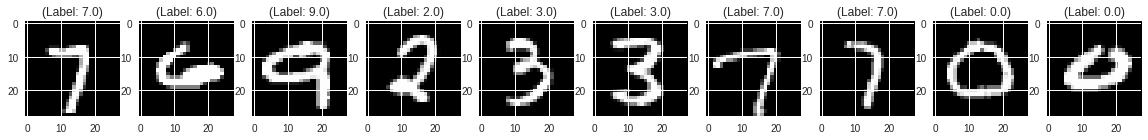

Reconstruction of Test Images


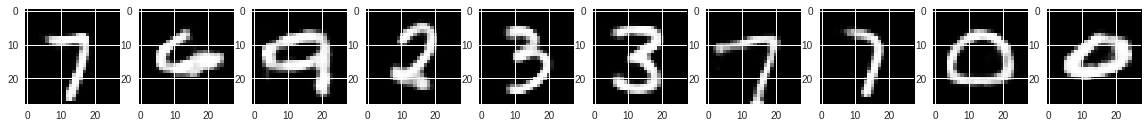

10 30 10


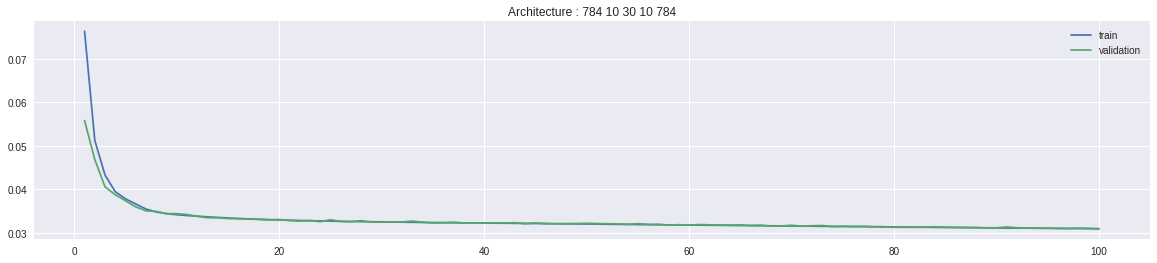

Test Images


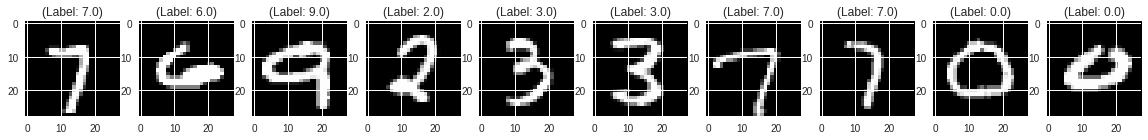

Reconstruction of Test Images


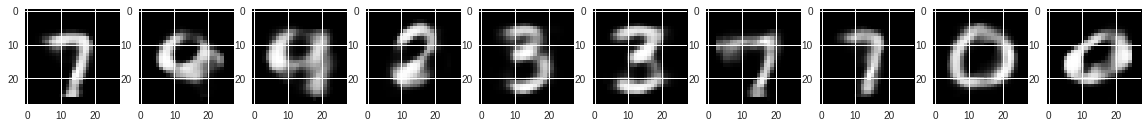

50 30 50


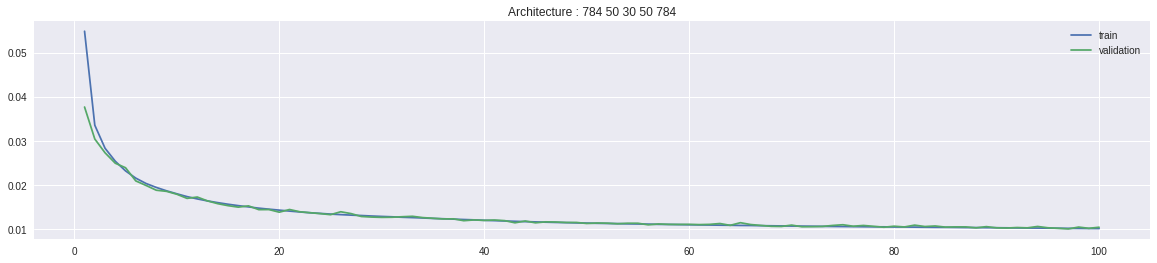

Test Images


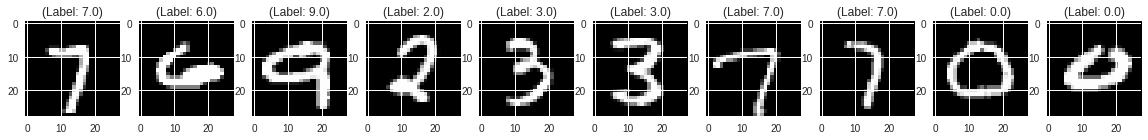

Reconstruction of Test Images


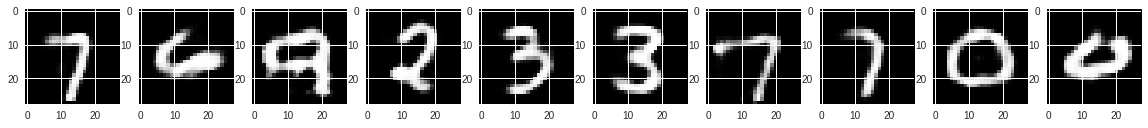

100 30 100


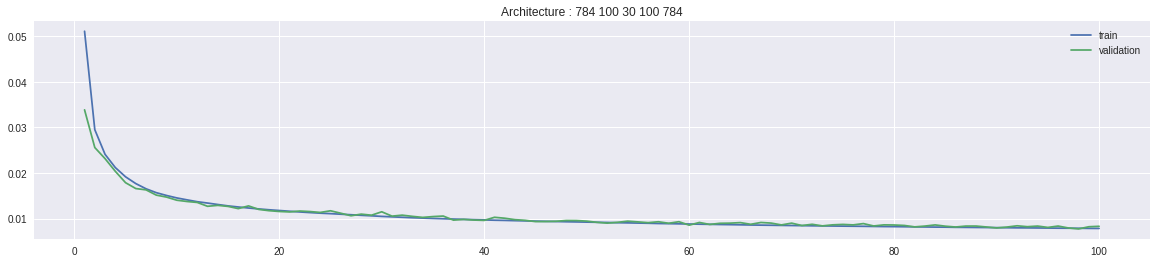

Test Images


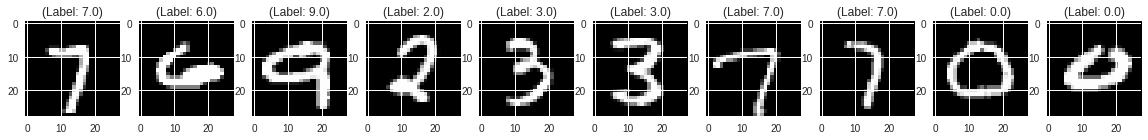

Reconstruction of Test Images


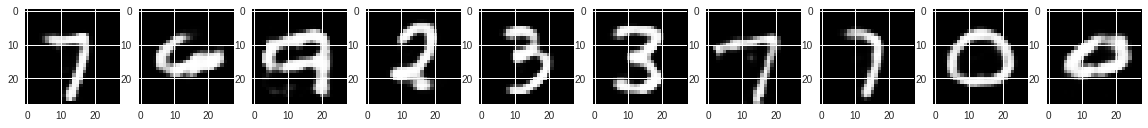

200 30 200


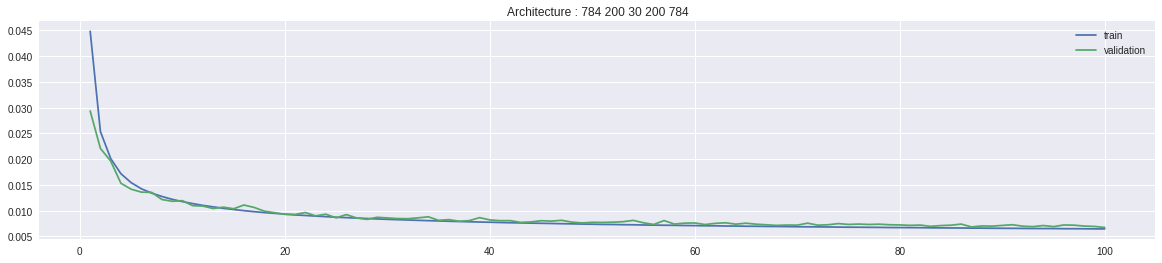

Test Images


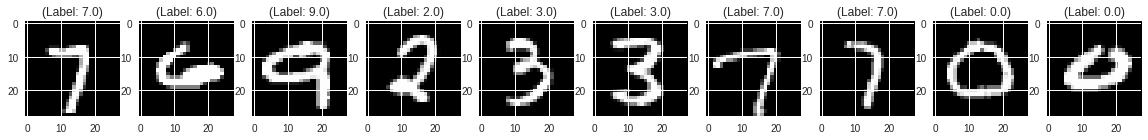

Reconstruction of Test Images


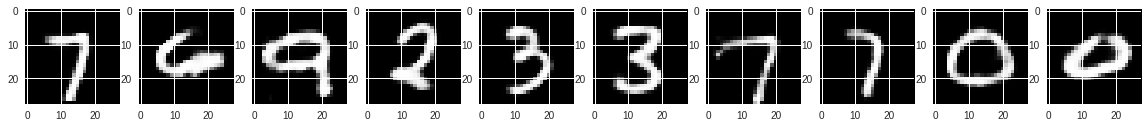

300 30 300


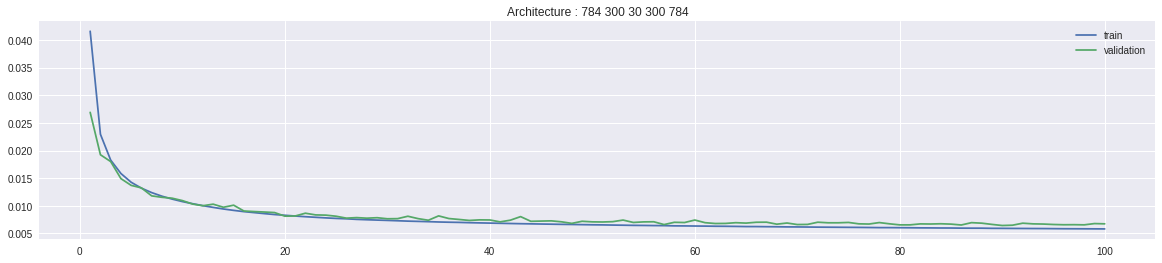

Test Images


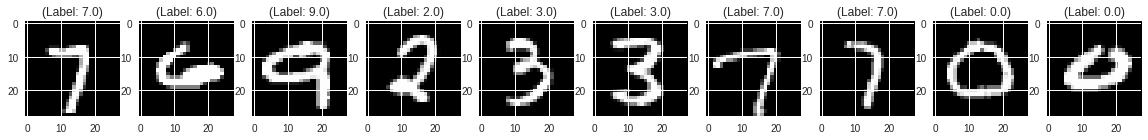

Reconstruction of Test Images


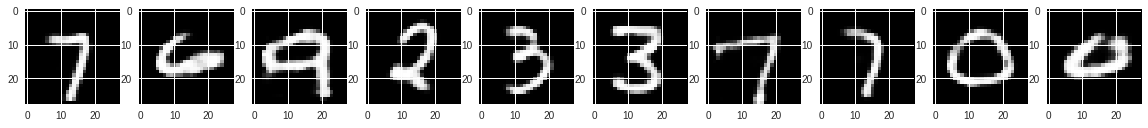

In [0]:
num=np.random.randint(10000)
epoch=100
l1 = [10, 50, 100, 200, 300]
l2 = [ 10,  20,  30]

for l_2 in l2:
  for l_1 in l1:
    print(l_1,l_2,l_1)
    mymodel = create_model(l1=l_1,l2=l_2)
    history=mymodel.fit(train_x,train_x,batch_size=200, epochs=epoch, verbose=0, callbacks=None, validation_split=0.1, validation_data=(valid_x,valid_ground), shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)
    plt.figure(figsize=(20,4))
    plt.plot(np.arange(1,epoch+1),history.history['loss'],label='train')
    plt.plot(np.arange(1,epoch+1),history.history['val_loss'], label='validation')
    plt.title("Architecture : "+ str(784)+' '+str(l_1)+' '+str(l_2)+' '+str(l_1)+' '+str(784))
    plt.legend()
    plt.savefig("gdrive/My Drive/ML_Fazli/"+str(784)+' '+str(l_1)+' '+str(l_2)+' '+str(l_1)+' '+str(784)+'.png',bbox_inches='tight')#,orientation='landscape')
    plt.show()
    testpred=mymodel.predict(x_test)
    plt.figure(figsize=(20,4))
    print("Test Images")
    for i in range(10):
      plt.subplot(2,10,i+1)
      plt.imshow(x_test[num+i].reshape(28,28),cmap='gray')
      label=y_test[num+i]
      plt.title('(Label: '+str(label)+')')
    plt.show()
    plt.figure(figsize=(20, 4))
    print("Reconstruction of Test Images")
    for i in range(10):
        plt.subplot(2, 10, i+1)
        plt.imshow(testpred[num+i].reshape(28,28), cmap='gray')  
    plt.savefig("gdrive/My Drive/ML_Fazli/"+str(784)+' '+str(l_1)+' '+str(l_2)+' '+str(l_1)+' '+str(784)+'images.png',bbox_inches='tight')#,orientation='landscape')
    plt.show()
    mymodel.save("gdrive/My Drive/ML_Fazli/"+str(784)+' '+str(l_1)+' '+str(l_2)+' '+str(l_1)+' '+str(784)+'.h5')  # creates a HDF5 file 'my_model.h5'
    del mymodel


In [0]:
l1 = [10, 50, 100, 200, 300]
l2 = [ 1,5,10,  20,  30]

class mymodels(Model):
    def __init__(self):
      self.mymod=dict()
      for l_2 in l2:
        for l_1 in l1:
          nameofmodel = 'arch_'+str(784)+'_'+str(l_1)+'_'+str(l_2)+'_'+str(l_1)+'_'+str(784)
          self.mymod[nameofmodel] = load_model('gdrive/My Drive/ML_Fazli/'+str(784)+' '+str(l_1)+' '+str(l_2)+' '+str(l_1)+' '+str(784)+'.h5')

In [0]:
models = mymodels()

In [0]:
min_loss_train=dict()
for model_ in models.mymod:
  print(model_)
  history = models.mymod[model_].fit(x_train,x_train,epochs=100,batch_size=200,verbose=0)
  print(np.min(history.history['loss']))
  min_loss_train[model_]=np.min(history.history['loss'])

arch_784_10_1_10_784
0.05957595355808735
arch_784_50_1_50_784
0.05477428376674652
arch_784_100_1_100_784
0.06725913534561793
arch_784_200_1_200_784
0.05101702708750963
arch_784_300_1_300_784


In [0]:
from mpl_toolkits.mplot3d import Axes3D  

xs=[]
ys=[]
zs=[]
for k in min_loss_train:
  xs.append(int(k.split()[2])*10)
  ys.append(int(k.split()[1]))
  zs.append(min_loss_train[k]*100)
fig = plt.figure(figsize=(20,20))

ax = Axes3D(fig)
ax.scatter(xs, ys, zs)
ax.set_xlabel('Bottleneck')
ax.set_ylabel('Side Nodes')
ax.set_zlabel('Loss')
plt.show()

NameError: ignored